 # Cvičení 9. Úvod do testování hypotéz, jednovýběrové testy
 ## Michal Béreš, Martina Litschmannová
 ---

In [41]:
# načteme dplyr
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# 1. Od intervalových odhadů k testům hypotéz
## I. Co je to statistický test hypotéz?
Mějme následující:
- náhodná veličina $X$ (například výška mužů)
- výběr z náhodné veličiny (měření výšky 30 mužů)

Statistické testování hypotéz rozhoduje na základě získaných dat z náhodného výběru o platnosti:
- $H_0$ - nulové hypotézy
- $H_A$ - alternativní hypotézy

Například:<br>
$H_0$: $\mu_X = 175$<br>
$H_A$: $\mu_X > 175$<br>
Jelikož se jedná o statistické rozhodnutí, vždy bude vázáno k nějaké hladnině významnosti $\alpha$. Vždy můžeme dospět pouze k 2 různým rozhodnutím:
- Zamítám $H_0$ ve prospěch $H_A$
    - to znamená, že tvrdím, že $H_0$ neplatí
    - toto rozhodnutí je s maximální chybou $\alpha$ (hladina významnosti, chyba I. druhu) - to znamená, že velikost této chyby jsme schopni ovlivnit
- Nezamítám $H_0$
    - to znamená, že tvrdím, že vzhledem k získaným datům (výběr) nelze vyvrátit $H_0$
    - toto rozhodnutí je s chybou $\beta$ (chyba II. druhu), tato chyba není přímo ovlivnitelná a záleží na typu použitého testu
    
Jak testy hypotéz souvisí s intervalovými odhady a jak do nich vstupuje hladina významnosti si ukážeme v další části.

## II. Intervalový odhad a hladina významnosti -> Klasický test

In [42]:
# mějme data z normálního rozdělení
data <- readxl::read_excel("data/uvod.xlsx")
head(data)

shapiro.test(data$data) # test normality

data
<dbl>
75.91
109.00
107.89
102.95
98.93
105.71



	Shapiro-Wilk normality test

data:  data$data
W = 0.96994, p-value = 0.5374


Vyrobíme 95% intervalový odhad střední hodnoty pomocí t-testu:

In [43]:
t.test(data$data, alternative = "two.sided", conf.level = 0.95)$conf.int


[1]  94.96065 103.40602
attr(,"conf.level")
[1] 0.95

Představme si nyní, že chceme testovat hypotézu:<br>
$H_0$: $\mu = 100$<br>
$H_A$: $\mu \neq 100$<br>
Jaké by bylo rozhodnutí vzhledem k spočtenému IO a tedy hladině významnosti $\alpha = 0.05$?

Představme si dále, že chceme testovat hypotézu:<br>
$H_0$: $\mu = 105$<br>
$H_A$: $\mu \neq 105$<br>
Jaké by bylo rozhodnutí vzhledem k spočtenému IO a tedy hladině významnosti $\alpha = 0.05$?

**To co jsme právě udělali se nazývá klasický test.**<br>
Ukážeme si ještě klasické testy pro jednostranné alternativy.<br>
$H_0$: $\mu = 105$<br>
$H_A$: $\mu > 105$<br>

In [44]:
t.test(data$data, alternative = "greater", conf.level = 0.95)$conf.int


[1] 95.67523      Inf
attr(,"conf.level")
[1] 0.95

$H_0$: $\mu = 105$<br>
$H_A$: $\mu < 105$<br>

In [45]:
t.test(data$data, alternative = "less", conf.level = 0.95)$conf.int


[1]     -Inf 102.6914
attr(,"conf.level")
[1] 0.95

Všimněte si, že první z těchto jednostranných alternativ vedla k "nezamítnutí" $H_0$. Je to z důvodu porovnávání nepravděpodobné $H_0$ s ještě méně pravděpodobnou $H_A$.
## III. Čistý test významnosti a souvislost s IO
Alternativou ke klasickému testu (kde vytváříme IO - v terminologii klasických testů tzv. obor přijetí a jeho doplněk do R kritický obor) je tzv. čistý test významnosti:

In [46]:
# H_0: mu = 105
# H_A: mu <> 105
t.test(data$data, mu = 105, alternative = "two.sided")



	One Sample t-test

data:  data$data
t = -2.8173, df = 29, p-value = 0.008629
alternative hypothesis: true mean is not equal to 105
95 percent confidence interval:
  94.96065 103.40602
sample estimates:
mean of x 
 99.18333 


In [47]:
t.test(data$data, mu = 105, alternative = "two.sided")$p.value


[1] 0.008628541

Výsledkem čistého testu významnosti je p-hodnota. Na jejím základě rozhodujeme o zamítnutí či nezamítnutí $H_0$.<br>
p-hodnota se dá chápat jako nejvyšší možná hladina váznamnosti, taková aby naše rozhodnutí bylo - nezamítám. Tedy IO/obor přijetí by obsahoval zkoumanou hodnotu:

In [48]:
# H_0: mu = 105
# H_A: mu <> 105

p.hod <- t.test(data$data, mu = 105, alternative = "two.sided")$p.value
p.hod

t.test(data$data, alternative = "two.sided", conf.level = 1 - p.hod)$conf.int


[1] 0.008628541

[1]  93.36667 105.00000
attr(,"conf.level")
[1] 0.9913715

In [49]:
# H_0: mu = 105
# H_A: mu > 105

p.hod <- t.test(data$data, mu = 105, alternative = "greater")$p.value
p.hod

t.test(data$data, alternative = "greater", conf.level = 1 - p.hod)$conf.int


[1] 0.9956857

[1] 105 Inf
attr(,"conf.level")
[1] 0.004314271

In [50]:
# H_0: mu = 105
# H_A: mu < 105

p.hod <- t.test(data$data, mu = 105, alternative = "less")$p.value
p.hod

t.test(data$data, alternative = "less", conf.level = 1 - p.hod)$conf.int


[1] 0.004314271

[1] -Inf  105
attr(,"conf.level")
[1] 0.9956857

---

# 2. Přehled testů
## I. Míry polohy
Mírami polohy rozumíme údaj určující polohu dat, nehledě na tom jak jsou rozptýlená. Pro data z normálního rozdělení můžeme odhadovat střední hodnotu, pro ostatní medián.
#### a) studentův t-test
- testujeme střední hodnotu
- data musejí pocházet z normálního rozdělení
    - exploračně: šikmost a špičatost leží v (-2,2)
    - exploračně: QQ graf má body přibližně na čáře
    - exaktně: pomocí statistického testu, např. Shapiro-Wilk test (shapiro.test(data))

In [51]:
# H_0: mu = 100
# H_A: mu <> 100
t.test(data$data, mu = 100, alternative = "two.sided")$p.value


[1] 0.695334

In [52]:
# H_0: mu = 100
# H_A: mu > 100
t.test(data$data, mu = 100, alternative = "greater")$p.value


[1] 0.652333

In [53]:
# H_0: mu = 100
# H_A: mu < 100
t.test(data$data, mu = 100, alternative = "less")$p.value


[1] 0.347667

#### b) Wilcoxnův test
- testujeme medián
- data musejí pocházet ze symetrického rozdělení
    - exploračně: šikmost leží v (-2,2)
    - exploračně: histogram vypadá přibližně symetricky
    - exaktně: pomocí statistického testu, např. balíček "lawstat", funkce "symmetry.test(data,boot=FALSE)"

In [54]:
# H_0: X_0.5 = 100
# H_A: X_0.5 <> 100
wilcox.test(data$data, mu = 100, alternative = "two.sided")$p.value


[1] 0.7921591

In [55]:
# H_0: X_0.5 = 100
# H_A: X_0.5 > 100
wilcox.test(data$data, mu = 100, alternative = "greater")$p.value


[1] 0.6117156

In [56]:
# H_0: X_0.5 = 100
# H_A: X_0.5 < 100
wilcox.test(data$data, mu = 100, alternative = "less")$p.value


[1] 0.3960795

#### c) znaménkový test test
- testujeme medián
- výběr většího rozsahu (>10)
- vyžaduje knihovnu "BSDA"
- jakožto nejrobustnější test, se dá použít i na nespojitá data - např. pořadí v nějakém seznamu

In [57]:
# H_0: X_0.5 = 100
# H_A: X_0.5 <> 100
BSDA::SIGN.test(data$data, md = 100, alternative = "two.sided")$p.value


[1] 0.8555356

In [58]:
# H_0: X_0.5 = 100
# H_A: X_0.5 > 100
BSDA::SIGN.test(data$data, md = 100, alternative = "greater")$p.value


[1] 0.7076676

In [59]:
# H_0: X_0.5 = 100
# H_A: X_0.5 < 100
BSDA::SIGN.test(data$data, md = 100, alternative = "less")$p.value


[1] 0.4277678

## II. Míry variability
Mírami variability rozumíme údaj určující rozptýlenost/variabilitu dat, nehledě na celkových hodnotách. Pro data z normálního rozdělení můžeme odhadovat směrodatnou odchylku.
### test směrodatné odchylky
- testujeme směrodatnou odchylku
- data musejí pocházet z normálního rozdělení
    - exploračně: šikmost a špičatost leží v (-2,2)
    - exploračně: QQ graf má body přibližně na čáře
    - exaktně: pomocí statistického testu, např. Shapiro-Wilk test (shapiro.test(data))
- vyžaduje balíček "EnvStats"
- funkce v Rku, porovnává rozptyl!!!

In [60]:
# H_0: sigma = 10
# H_A: sigma <> 10
EnvStats::varTest(data$data,
    sigma.squared = 10 * 10,
    alternative = "two.sided"
)$p.value


[1] 0.2880646

In [61]:
# H_0: sigma = 10
# H_A: sigma > 10
EnvStats::varTest(data$data,
    sigma.squared = 10 * 10,
    alternative = "greater"
)$p.value


[1] 0.1440323

In [62]:
# H_0: sigma = 10
# H_A: sigma < 10
EnvStats::varTest(data$data,
    sigma.squared = 10 * 10,
    alternative = "less"
)$p.value


[1] 0.8559677

## III. Pravděpodobnost výskytu u jednoho výběru
### IO pravděpodobnosti
- testujeme pravděpodobnost
- vyžadujeme dostatečný počet dat: $n>\frac{9}{p(1-p)}$
- Clopperův - Pearsonův odhad (binom.test)
    - jako parametr nebere data, ale počet úspěchů a počet pozorování 

In [63]:
pi <- 0.3
data_bin <- runif(n = 100, min = 0, max = 1) < pi

n <- length(data_bin)
x <- sum(data_bin)
n
x


[1] 100

[1] 28

In [64]:
# H_0: pi = 0.2
# H_A: pi <> 0.2
binom.test(x = x, n = n, p = 0.2, alternative = "two.sided")$p.value


[1] 0.05948038

In [65]:
# H_0: pi = 0.2
# H_A: pi > 0.2
binom.test(x = x, n = n, p = 0.2, alternative = "greater")$p.value


[1] 0.03415163

In [66]:
# H_0: pi = 0.2
# H_A: pi < 0.2
binom.test(x = x, n = n, p = 0.2, alternative = "less")$p.value


[1] 0.9799798

---

# Příklady
## Příklad 1.
Máme výběr 216 pacientů a změřili jsme jejich bílkovinné sérum (soubor `data/testy_jednovyberove.xlsx` list `bilk_serum`). Ověřte, zda se průměrné bílkovinné sérum (Albumin) všech pacientů tohoto typu (populační průměr µ) statisticky významně liší od hodnoty 35 g/l.

In [67]:
# Načtení dat z xlsx souboru (pomoci balíčku readxl)
albumin <- readxl::read_excel("data/testy_jednovyberove.xlsx",
    sheet = "bilk_serum"
)
colnames(albumin) <- "hodnoty"
head(albumin)


hodnoty
<dbl>
33.874
34.718
34.957
34.758
35.280
34.621


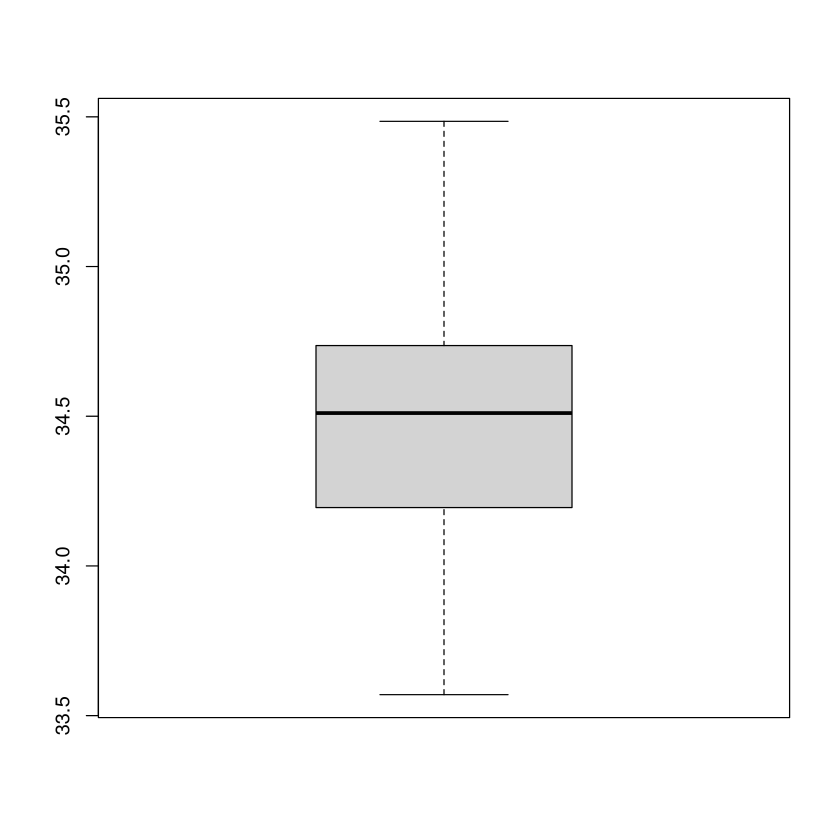

In [68]:
# Explorační analýza - zhodnocení OP
boxplot(albumin$hodnoty)


In [69]:
# Předpoklad normality ověříme Shapirovovým - Wilkovovým testem.
# H0: Data jsou výběrem z normálního rozdělení.
# Ha: Data nejsou výběrem z normálního rozdělení.
shapiro.test(albumin$hodnoty)
# p-value > 0.05 -> Na hl. významnosti 0,05 nelze předpoklad normality zamít.



	Shapiro-Wilk normality test

data:  albumin$hodnoty
W = 0.99151, p-value = 0.2358


In [70]:
# normalita OK -> t.test

# H0: mu = 35 g/l
# Ha: mu <> 35 g/l

t.test(albumin$hodnoty, mu = 35, alternative = "two.sided")

# p-value < 0.05 -> Na hl. významnosti 0,05 zamítáme nulovou hypotézu
# ve prospěch hypotézy alternativní
# Střední hodnota albuminu se statisticky významně liší od 35 g/l.



	One Sample t-test

data:  albumin$hodnoty
t = -19.249, df = 217, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 35
95 percent confidence interval:
 34.43421 34.53932
sample estimates:
mean of x 
 34.48677 


In [71]:
# Pokud budeme chtít zaokrouhlovat:
length(albumin$hodnoty) # sd zaokrouhlujeme na 3 platné cifry
sd(albumin$hodnoty) # sd a míry polohy zaokrouhlujeme na tisíciny


[1] 218

[1] 0.393683

## Příklad 2.
V souboru `data/testy_jednovyberove.xlsx` list `preziti` jsou uvedeny doby přežití pro 100 pacientů s rakovinou plic léčených novým lékem. Z předchozích studií je známo, že průměrné přežití takových pacientů bez podávání nového léku je 22,2 měsíce. Lze na základě těchto dat usoudit, že nový lék prodlužuje přežití?

In [72]:
# Načtení dat z xlsx souboru (pomoci balíčku readxl)
preziti <- readxl::read_excel("data/testy_jednovyberove.xlsx",
    sheet = "preziti"
)
colnames(preziti) <- "hodnoty"
head(preziti)


hodnoty
<dbl>
27
6
9
62
10
10


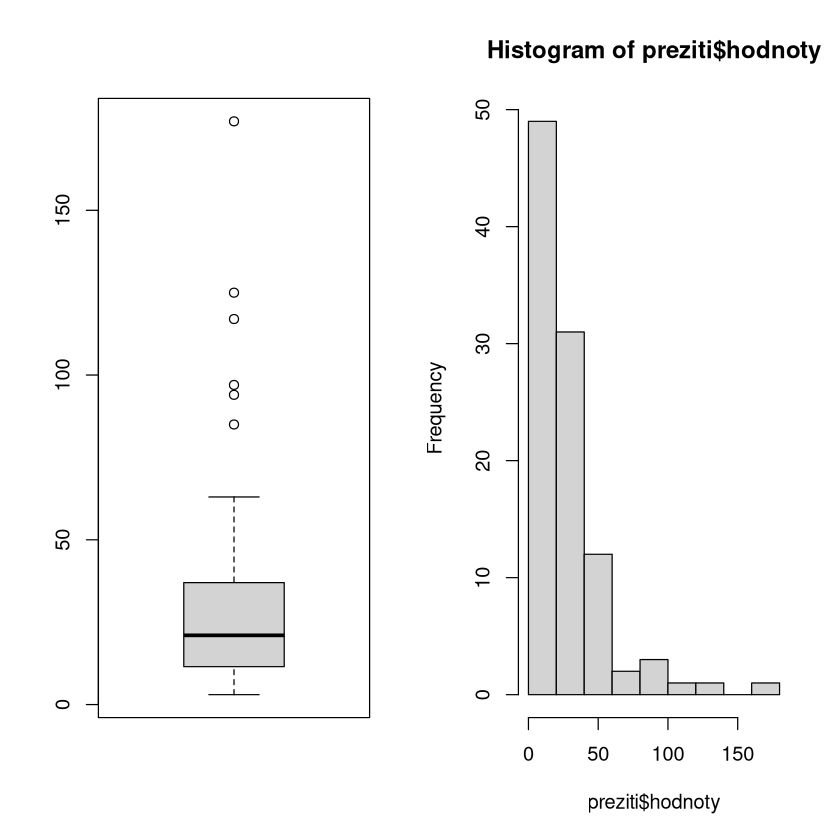

In [73]:
## Explorační analýza - zhodnocení OP -> zhodnocení typu rozdělení
par(mfrow = c(1, 2)) # matice grafů 1x2

boxplot(preziti$hodnoty)
hist(preziti$hodnoty)


**Data obsahují OP -> můžeme je odstranit. Nebo si také všimnout, že se pravděpdobně jedná o exponenciální rozdělení a OP tam ve skutečnosti nejsou (rozdělení se tak prostě chová).**

In [74]:
# Exponenciální rozdělení, tedy: normalita zamítnuta -> symetrie zamítnuta -> Sign. test
# H0: median = 22,2 měsíců
# Ha: median > 22,2 měsíců

BSDA::SIGN.test(preziti$hodnoty,
    md = 22.2,
    alternative = "greater", conf.level = 0.95
)

# p-value > 0.05 -> Na hl. významnosti 0,05 nelze zamítnout nulovou hypotézu
# Medián doby přežití není statisticky významně větší než 22,2 měsíců.



	One-sample Sign-Test

data:  preziti$hodnoty
s = 46, p-value = 0.8159
alternative hypothesis: true median is greater than 22.2
95 percent confidence interval:
  19 Inf
sample estimates:
median of x 
         21 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level L.E.pt U.E.pt
Lower Achieved CI     0.9334     19    Inf
Interpolated CI       0.9500     19    Inf
Upper Achieved CI     0.9557     19    Inf


In [75]:
# lepší závěr je, že medián doby přežití se stat. významně neliší od 22,2 měsíců

# H0: median = 22,2 měsíců
# Ha: median != 22,2 měsíců

BSDA::SIGN.test(preziti$hodnoty,
    md = 22.2,
    alternative = "two.sided", conf.level = 0.95
)



	One-sample Sign-Test

data:  preziti$hodnoty
s = 46, p-value = 0.4841
alternative hypothesis: true median is not equal to 22.2
95 percent confidence interval:
 18 27
sample estimates:
median of x 
         21 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level L.E.pt U.E.pt
Lower Achieved CI     0.9431     18     27
Interpolated CI       0.9500     18     27
Upper Achieved CI     0.9648     18     27


In [76]:
# pokud chceme výsledek zaokrouhlit
length(preziti$hodnoty)
sd(preziti$hodnoty)

[1] 100

[1] 27.59331

## Příklad 3.
Automat vyrábí pístové kroužky o daném průměru. Výrobce udává, že směrodatná odchylka průměru kroužku je 0,05 mm. K ověření této informace bylo náhodně vybráno 80 kroužků a vypočtena směrodatná odchylka jejich průměru 0,04 mm. Lze tento rozdíl považovat za statisticky významný ve smyslu zlepšení kvality produkce? Ověřte čistým testem významnosti. Předpokládejte, že průměr pístových kroužků má normální rozdělení.

In [77]:
# Test o směrodatné odchylce

# Předpokládáme normalitu dat (dle zadání)
n <- 80 # rozsah souboru
s <- 0.04 # mm .... výběrová směrodatná odchylka (bodový odhad sm. odchylky)

# H0: sigma = 0.05 mm
# Ha: sigma < 0.05 mm

x.obs <- (n - 1) * s^2 / 0.05^2
x.obs


[1] 50.56

In [78]:
p.hodnota <- pchisq(x.obs, n - 1)
p.hodnota

# p.hodnota < 0.05 -> Na hladině významnosti 0,05 zamítáme nulovou hypotézu
# ve prospěch alternativní hypotézy
# Směr. odchylka průměru kroužku je statisticky významně menší než 0,05 mm.


[1] 0.005294016

## Příklad 4.
Automat vyrábí pístové kroužky o daném průměru. Výrobce udává, že směrodatná odchylka průměru kroužku je 0,05 mm. K ověření této informace bylo náhodně vybráno 80 kroužků a byl změřen jejich průměr (soubor `data/testy_jednovyberove.xlsx` list `krouzky`). Lze zjištěné výsledky považovat za statisticky významné ve smyslu zlepšení kvality produkce? Ověřte čistým testem významnosti.

In [79]:
# Načtení dat z xlsx souboru (pomoci balíčku readxl)
krouzky <- readxl::read_excel("data/testy_jednovyberove.xlsx",
    sheet = "krouzky"
)
colnames(krouzky) <- "hodnoty"
head(krouzky)


hodnoty
<dbl>
10.00
10.03
9.96
10.00
9.98
10.02


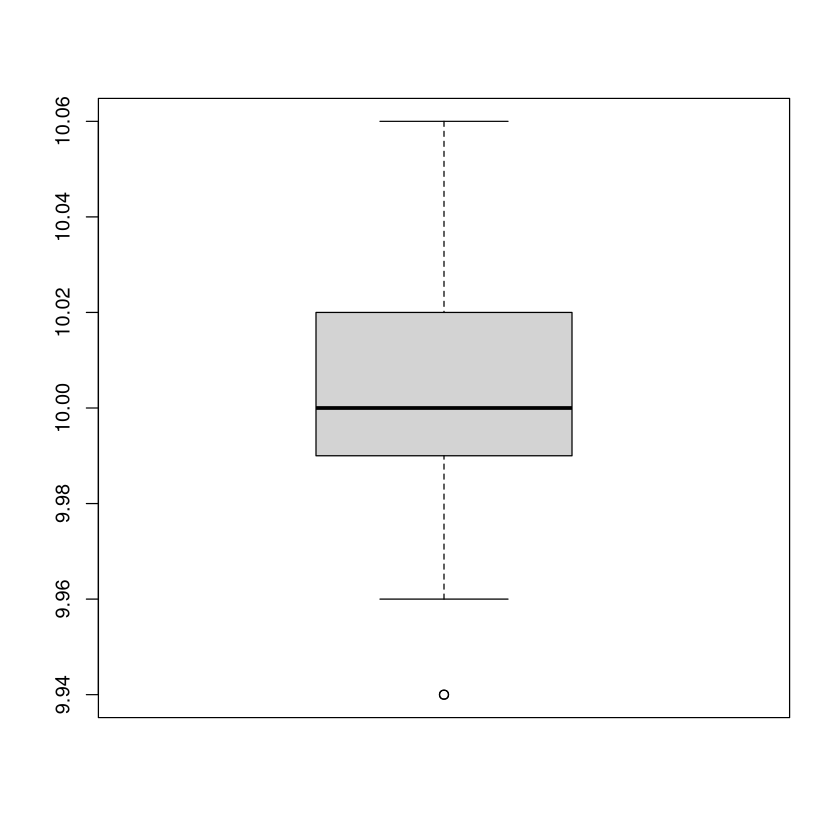

In [80]:
# Explorační analýza - zhodnocení OP
boxplot(krouzky$hodnoty)


hodnoty,id,is.outlier,is.extreme
<dbl>,<int>,<lgl>,<lgl>
9.94,30,TRUE,FALSE
9.94,41,TRUE,FALSE


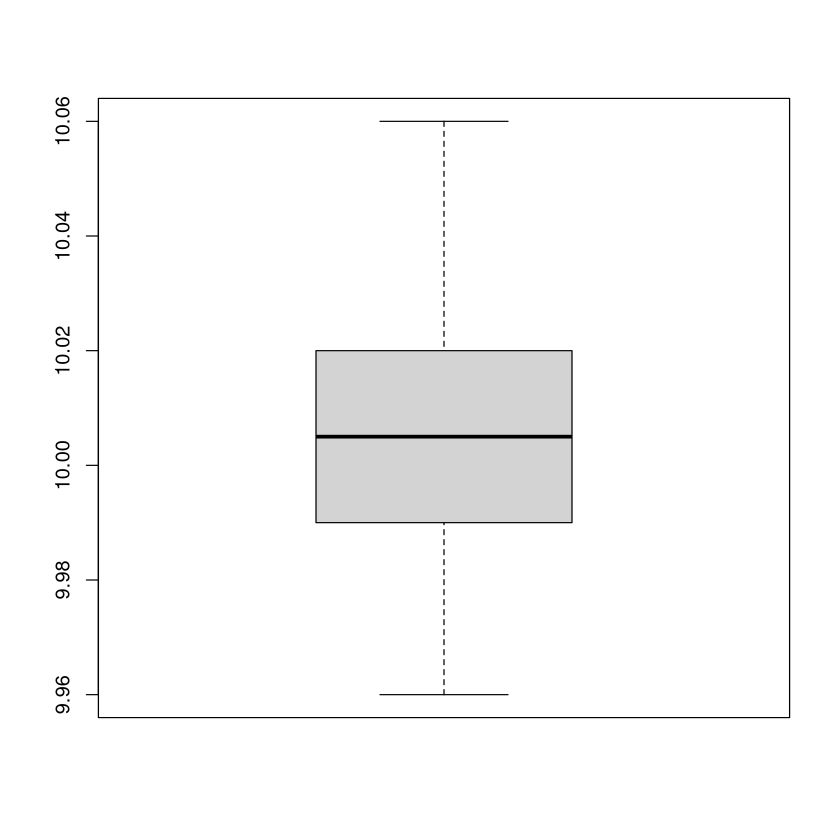

In [81]:
# Data obsahují odlehlá pozorování, odstraníme je:

# přidáme id
krouzky <- krouzky %>% mutate(id = row_number())

# identifikace odlehlých pozorování
outliers <- krouzky %>% rstatix::identify_outliers(hodnoty)
outliers

# odstranění odlehlých pozorování
krouzky <- krouzky %>% mutate(hodnoty.bez = ifelse(id %in% outliers$id, NA, hodnoty))

boxplot(krouzky$hodnoty.bez)

In [82]:
# test normality.
# Předpoklad normality ověříme Shapirovovým . Wilkovovým testem.
shapiro.test(krouzky$hodnoty.bez)
# p-value > 0.05 -> Na hl. významnosti 0,05 nelze předpoklad norm. zamítnout



	Shapiro-Wilk normality test

data:  krouzky$hodnoty.bez
W = 0.97005, p-value = 0.0628


In [83]:
# test na míru variability -> test o rozptylu

# H0: sigma = 0,05 mm
# Ha: sigma < 0,05 mm
EnvStats::varTest(krouzky$hodnoty.bez,
    sigma.squared = 0.05^2,
    alternative = "less"
)

# p-value < 0.05 -> Na hladině významnosti 0,05 zamítáme H0 ve prospěch Ha


Warning message in is.not.finite.warning(x):
“There were 2 nonfinite values in x : 2 NA's”
Warning message in EnvStats::varTest(krouzky$hodnoty.bez, sigma.squared = 0.05^2, :
“2 observations with NA/NaN/Inf in 'x' removed.”



Results of Hypothesis Test
--------------------------

Null Hypothesis:                 variance = 0.0025

Alternative Hypothesis:          True variance is less than 0.0025

Test Name:                       Chi-Squared Test on Variance

Estimated Parameter(s):          variance = 0.0006173327

Data:                            krouzky$hodnoty.bez

Test Statistic:                  Chi-Squared = 19.01385

Test Statistic Parameter:        df = 77

P-value:                         1.353973e-12

95% Confidence Interval:         LCL = 0.0000000000
                                 UCL = 0.0008225911


In [84]:
# Jak najít 95% intervalový odhad směrodatné odchylky?
pom <- EnvStats::varTest(krouzky$hodnoty.bez,
    sigma.squared = 0.05^2,
    alternative = "less", conf.level = 0.95
)

sqrt(pom$conf.int)


Warning message in is.not.finite.warning(x):
“There were 2 nonfinite values in x : 2 NA's”
Warning message in EnvStats::varTest(krouzky$hodnoty.bez, sigma.squared = 0.05^2, :
“2 observations with NA/NaN/Inf in 'x' removed.”


LCL        UCL 
0.00000000 0.02868085 
attr(,"conf.level")
[1] 0.95

In [85]:
# jak budeme zaokrouhlovat?
length(na.omit(krouzky$hodnoty.bez)) # sd zaokrouhlujeme na 3 platné cifry
sd(krouzky$hodnoty.bez, na.rm = TRUE) # sd a míry polohy zaokr. na tisíciny


[1] 78

[1] 0.02484618

## Příklad 5.
Firma TT udává, že 1% jejich rezistorů nesplňuje požadovaná kritéria. V testované dodávce 1000 ks bylo nalezeno 15 nevyhovujících rezistorů. Potvrzuje tento výsledek tvrzení TT? Ověřte čistým testem významnosti.

In [86]:
n <- 1000 # rozsah výběru
x <- 15 # počet "úspěchů"
p <- x / n # relativní četnost (bodový odhad pravděpodobnosti)
p


[1] 0.015

In [87]:
# Ověření předpokladů
9 / (p * (1 - p))
# Dále předpokládáme  n/N < 0.05, tj. že daná populace (rezistorů) má rozsah
# alespoň 1000/0.05 = 1000*20 = 20 000 rezistorů


[1] 609.1371

In [88]:
## Clopperův - Pearsonův (exaktní) test
## H0: pi = 0.01
## Ha: pi != 0.01

binom.test(x = x, n = n, p = 0.01, alternative = "two.sided")



	Exact binomial test

data:  x and n
number of successes = 15, number of trials = 1000, p-value = 0.1111
alternative hypothesis: true probability of success is not equal to 0.01
95 percent confidence interval:
 0.00841905 0.02461970
sample estimates:
probability of success 
                 0.015 
